# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from hmmlearn import hmm
from hmmlearn import hmm
from hmmlearn.hmm import GaussianHMM
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import os
import math
import time
import multiprocessing
from random import shuffle
import operator
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import animation
np.seterr(invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# Principal Component Analysis of Left,Right,Head

In [11]:
X=[[521, 106], [511, 288], [364, 296], [251, 490], [487, 346], [668, 288], [660, 510], [592, 390], [430, 597], [585, 601], [485, 84], [549, 82], [434, 113], [589, 111]]
for x in range(len(X)):
    if(X[x]==None):
        X[x]=[1000,1000]
pca = sklearnPCA(n_components=1)
X=pca.fit_transform(X)
#pca.explained_variance_ratio_ #2% information loss
X

array([[-201.64004003],
       [ -19.37493551],
       [  -1.83578616],
       [ 199.09968628],
       [  40.06255713],
       [ -29.5810794 ],
       [ 192.46940212],
       [  77.14372284],
       [ 294.23705456],
       [ 288.15246439],
       [-221.2532431 ],
       [-227.40947898],
       [-188.99921262],
       [-201.07111152]])

In [12]:
left=[[156, 208], None, None, None, None, None, [308, 191], [300, 265], [293, 269], None, [284, 243], [272, 262], [268, 267], [260, 218], [259, 238], [251, 259], [245, 268], [250, 219], [243, 235], [236, 245], [227, 257]]
for x in range(len(left)):
    if(left[x]==None):
        left[x]=[0,0]
pca = sklearnPCA(n_components=1)
left=pca.fit_transform(left)
#pca.explained_variance_ratio_ 15% information loss

In [13]:
right=[[15, 180], [33, 178], [65, 172], [99, 169], [131, 161], [75, 123], [122, 130], None, None, [90, 109], [153, 129], None, None, [106, 106], [152, 130], None, None, [113, 109], [144, 130], [140, 138], None]
for x in range(len(right)):
    if(right[x]==None):
        right[x]=[0,0]
pca = sklearnPCA(n_components=1)
right=pca.fit_transform(right)
#pca.explained_variance_ratio_ #15% information loss

In [14]:
dfhead=pd.DataFrame(data=X)
dfhead=dfhead.T
dfhead=dfhead.rename(columns={0:"head_1",1:"head_2",2:"head_3",3:"head_4",4:"head_5",5:"head_6",6:"head_7",7:"head_8",8:"head_9",9:"head_10",10:"head_11",11:"head_12",12:"head_13",13:"head_14"})
dfhead

,head_1,head_2,head_3,head_4,head_5,head_6,head_7,head_8,head_9,head_10,head_11,head_12,head_13,head_14
0,-201.64004,-19.374936,-1.835786,199.099686,40.062557,-29.581079,192.469402,77.143723,294.237055,288.152464,-221.253243,-227.409479,-188.999213,-201.071112


# Convert all values into a Pandas DataFrame

#### Transform Left Hand keypoints to a Pandas DataFrame

In [16]:
dfleft=pd.DataFrame(data=left)
dfleft=dfleft.T
dfleft=dfleft.rename(columns={0:"left_1",1:"left_2",2:"left_3",3:"left_4",4:"left_5",5:"left_6",6:"left_7",7:"left_8",8:"left_9",9:"left_10",10:"left_11",11:"left_12",12:"left_13",13:"left_14",14:"left_15",15:"left_16",16:"left_17",17:"left_18",18:"left_19",19:"left_20",20:"left_21"})
dfleft

,left_1,left_2,left_3,left_4,left_5,left_6,left_7,left_8,left_9,left_10,...,left_12,left_13,left_14,left_15,left_16,left_17,left_18,left_19,left_20,left_21
0,-3.358081,252.489634,252.489634,252.489634,252.489634,252.489634,-103.179776,-147.668362,-145.260297,252.489634,...,-125.1081,-125.57892,-86.375717,-99.251317,-107.677588,-109.404449,-79.727924,-85.484911,-87.159372,-88.729032


### Transform Right Hand Keypoints to a Pandas DataFrame

In [17]:
dfright=pd.DataFrame(data=right)
dfright=dfright.T
dfright=dfright.rename(columns={0:"right_1",1:"right_2",2:"right_3",3:"right_4",4:"right_5",5:"right_6",6:"right_7",7:"right_8",8:"right_9",9:"right_10",10:"right_11",11:"right_12",12:"right_13",13:"right_14",14:"right_15",15:"right_16",16:"right_17",17:"right_18",18:"right_19",19:"right_20",20:"right_21"})
dfright

,right_1,right_2,right_3,right_4,right_5,right_6,right_7,right_8,right_9,right_10,...,right_12,right_13,right_14,right_15,right_16,right_17,right_18,right_19,right_20,right_21
0,-34.467756,-44.094899,-59.295499,-78.089206,-91.723543,-27.140608,-61.849758,115.823782,115.823782,-25.504603,...,115.823782,115.823782,-33.104903,-80.505436,115.823782,115.823782,-39.80729,-75.530589,-79.308218,115.823782


### Concatenate the head,left,right dataframe and save it to a csv.

In [18]:
df=pd.concat([dfhead, dfleft,dfright], axis=1)
df=df[0:0]
df.to_csv("sample.csv",index=False)

In [20]:
import os

def buildGestureDict(path):
	if os.path.isdir(path):
		gestureDict = {}

		for item in os.listdir(path):
			subpath = os.path.join(path, item)
			if (os.path.isdir(subpath)):
				gesture = gestureDict[item] = {
					'videos': []
				}

				for item in os.listdir(subpath):
					if (item.lower().endswith('.mp4')):
						split = item.split('-')
						video = {
							'filepath': subpath+"/"+item, # with respect to the path argument
							'filename': item,
							'no': int(split[0]),
							'gesture': split[1],
							'actor': split[2].split('.')[0]
						}

						gesture['videos'].append(video)

		return gestureDict
    
sample=buildGestureDict("dataset/")
sample

{'1': {'videos': [{'filepath': 'dataset/1/1-1-jer.mp4',
    'filename': '1-1-jer.mp4',
    'no': 1,
    'gesture': '1',
    'actor': 'jer'},
   {'filepath': 'dataset/1/1-1-jolo.mp4',
    'filename': '1-1-jolo.mp4',
    'no': 1,
    'gesture': '1',
    'actor': 'jolo'},
   {'filepath': 'dataset/1/1-1-kyle.mp4',
    'filename': '1-1-kyle.mp4',
    'no': 1,
    'gesture': '1',
    'actor': 'kyle'},
   {'filepath': 'dataset/1/1-1-min.mp4',
    'filename': '1-1-min.mp4',
    'no': 1,
    'gesture': '1',
    'actor': 'min'}]},
 '2': {'videos': [{'filepath': 'dataset/2/1-2-jer.mp4',
    'filename': '1-2-jer.mp4',
    'no': 1,
    'gesture': '2',
    'actor': 'jer'},
   {'filepath': 'dataset/2/1-2-jolo.mp4',
    'filename': '1-2-jolo.mp4',
    'no': 1,
    'gesture': '2',
    'actor': 'jolo'},
   {'filepath': 'dataset/2/1-2-kyle.mp4',
    'filename': '1-2-kyle.mp4',
    'no': 1,
    'gesture': '2',
    'actor': 'kyle'},
   {'filepath': 'dataset/2/1-2-min.mp4',
    'filename': '1-2-min.mp4',
  

In [30]:
for x in sample:
    print(x+".csv")
    for video in  sample[x]["videos"]:
        filepath=video["filepath"]
        gesture=video["gesture"]
        speaker=video["actor"]

again.csv
all.csv
bad.csv
bathroom.csv
before.csv
big.csv
boy.csv
doctor.csv
father.csv
fine.csv
finish.csv
first.csv
friday.csv
friend.csv
girl.csv
goodbye.csv
good_1.csv
good_2.csv
hello.csv
help.csv
hospital.csv
hungry.csv
language.csv
later.csv
live.csv
love.csv
meet_1.csv
meet_2.csv
monday.csv
morning.csv
mother.csv
name.csv
night.csv
no.csv
nothing.csv
okay.csv
please.csv
ready_1.csv
ready_2.csv
saturday.csv
small.csv
sorry.csv
sunday.csv
teach.csv
thank you.csv
thankyou.csv
thursday.csv
today.csv
tomorrow.csv
tuesday.csv
understand.csv
wednesday.csv
welcome.csv
where.csv
yes.csv
you.csv


In [31]:
testing=pd.read_csv("testsave.csv")
testing

,head_1,head_2,head_3,head_4,head_5,head_6,head_7,head_8,head_9,head_10,...,right_15,right_16,right_17,right_18,right_19,right_20,right_21,frame,gesture,speaker
0,-45.598327,-150.024087,-12.268116,-123.150291,592.648717,-286.669179,-480.161243,-545.157230,592.648717,592.648717,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,Monday,Kalbo
1,153.183665,-9.134377,72.792640,-77.131622,-250.813036,-93.632597,-350.285875,-458.781987,-283.665699,625.047642,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,Monday,Kalbo
2,-257.252334,-62.034792,-59.908610,164.991826,228.300128,-60.082127,164.743944,357.580747,300.818789,306.944927,...,-28.219854,-34.746535,-37.371310,-19.540587,-19.138907,-23.176291,-27.011647,2.0,Monday,Kalbo
3,-5.939419,-101.366557,28.979405,-80.408256,-2.586001,-235.785831,-408.979006,-524.054760,635.476964,635.476964,...,-37.923946,-44.914255,-51.813803,2.043373,-14.900132,-21.544593,-26.038005,3.0,Monday,Kalbo
4,112.110388,-22.031792,80.281248,-120.040494,-35.864636,-123.031054,-337.083639,-487.810207,-258.550737,653.333624,...,-143.039737,-164.878824,-183.784952,-101.583447,-115.080412,-131.672631,-148.637956,4.0,Monday,Kalbo
5,108.081296,-20.421535,80.014678,-107.188126,-46.280841,-125.197584,-343.226732,-481.813832,-250.757951,655.659977,...,6.305895,-24.804994,-44.315058,44.880166,6.849808,-14.211785,-33.008497,5.0,Monday,Kalbo
6,-3.276345,-95.210267,39.666116,-99.679610,-36.700066,-231.332563,-407.601902,-520.696332,641.482070,641.482070,...,-184.234591,-209.353297,-225.163499,-139.994216,-151.014993,-177.419943,-188.838875,6.0,Monday,Kalbo
7,114.454000,-17.861565,80.268726,-129.959591,-69.279502,-120.232053,-327.345778,-483.367255,-253.309087,654.080462,...,-192.030968,-216.702241,-236.887828,-153.989834,-162.217309,-180.907667,-200.508886,7.0,Monday,Kalbo
8,112.976129,-18.245013,79.061014,-129.868975,-53.940850,-120.187341,-336.663298,-484.366134,-252.279729,654.009422,...,-138.727956,-162.466100,-179.527890,-96.913220,-113.375622,-128.882564,-146.929486,8.0,Monday,Kalbo
9,29.456970,-80.555567,40.769113,-101.061281,644.523222,-207.410963,-392.267172,-518.445008,-256.518026,644.523222,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.0,Monday,Kalbo


In [125]:
path = '50-50/complete/'
df=pd.DataFrame(columns=["gesture","numHiddenStates","Total True","Total Test","Accuracy","Actual","Predicted"])
for filename in os.listdir(path):
    #print(filename)
    dffile=pd.read_csv("50-50/complete/"+filename)
    df=df.append(dffile,sort=False)
df
df.to_csv("50-50/complete.csv",index=False)

In [30]:
dynamic=pd.read_csv("dynamic.csv")
dynamic=dynamic.replace("thankyou","thank you")
dynamic.to_csv("dynamic.csv",index=False)

In [137]:
df=pd.read_csv("dataset.csv")
df=df.replace("thankyou","thank you")
df=df.replace("1.0","1")
df=df.replace("2.0","2")
df=df.replace("3.0","3")
df=df.replace("4.0","4")
df=df.replace("5.0","5")
df=df.replace("6.0","6")
df=df.replace("7.0","7")
df=df.replace("8.0","8")
df=df.replace("9.0","9")
df[df["gesture"].str.len()>1].to_csv("dynamic.csv")
df[df["gesture"].str.len()<2].to_csv("static.csv")

In [239]:
path = 'HMMmodels/dynamicset1'
#df2=pd.read_csv("sample.csv")
for filename in os.listdir(path):
    print(filename.split(".pkl")[0])

after
all
bad
big
doctor
fine
girl
good
hello
last
like
love
monday
mother
nothing
please
ready
small
sorry
sunday
teach
thank you
thursday
understand
wednesday
welcome
where
yes


In [257]:
df2["gesture"].unique().tolist()

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 'a',
 'after',
 'again',
 'all',
 'b',
 'bad',
 'bathroom',
 'before',
 'big',
 'boy',
 'c',
 'd',
 'doctor',
 'e',
 'f',
 'father',
 'fine',
 'finish',
 'first',
 'friday',
 'friend',
 'g',
 'girl',
 'good',
 'goodbye',
 'h',
 'hello',
 'help',
 'hospital',
 'hungry',
 'i',
 'j',
 'k',
 'l',
 'language',
 'last',
 'later',
 'like',
 'live',
 'love',
 'm',
 'meet',
 'monday',
 'morning',
 'mother',
 'n',
 'name',
 'night',
 'no',
 'nothing',
 'o',
 'okay',
 'p',
 'please',
 'q',
 'r',
 'ready',
 's',
 'saturday',
 'small',
 'sorry',
 'start',
 'sunday',
 't',
 'teach',
 'thank you',
 'thursday',
 'today',
 'tomorrow',
 'tuesday',
 'u',
 'understand',
 'v',
 'w',
 'wednesday',
 'welcome',
 'where',
 'x',
 'y',
 'yes',
 'you',
 'z']

In [250]:
df=df.append(df2,sort=False)

In [251]:
df.to_csv("dataset1-6.csv",index=False)

In [20]:
df=pd.read_csv("dataset1-6.csv")

,head_1,head_2,head_3,head_4,head_5,head_6,head_7,head_8,head_9,head_10,...,right_15,right_16,right_17,right_18,right_19,right_20,right_21,frame,gesture,speaker
0,-216.629445,-78.863662,-62.331491,133.997137,380.481566,-88.277196,110.699692,356.390206,239.546773,230.313245,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1.0,jer
1,-212.548188,-74.819194,-59.018039,131.221680,323.571951,-83.509698,115.932987,361.654539,245.222152,239.721829,...,-275.200497,-275.200497,-275.200497,-275.200497,-275.200497,-275.200497,-275.200497,1,1.0,jer
2,-193.884186,-61.024351,-69.336202,116.503566,90.557602,-46.176213,160.093458,413.747847,242.971970,263.918711,...,-234.683771,-234.683771,-234.683771,-234.683771,-234.683771,-234.683771,-234.683771,2,1.0,jer
3,-176.524482,-47.555117,-81.925391,81.546239,-86.800888,-15.679804,188.668001,447.142804,243.690064,285.215812,...,-510.174501,-510.174501,-510.174501,639.211618,-510.174501,-510.174501,-510.174501,3,1.0,jer
4,-176.185181,-45.995061,-72.864577,82.776308,-117.510556,-16.278851,192.323229,446.809708,248.643469,285.270613,...,11.662280,-6.933117,-19.438155,-18.968448,-8.198719,-8.628352,-12.593842,4,1.0,jer
5,-179.157685,-49.359688,-78.679839,91.247465,-86.555326,-17.877787,188.248689,440.435146,247.042589,280.710297,...,-288.377574,-288.377574,-288.377574,-288.377574,-288.377574,-288.377574,953.585891,5,1.0,jer
6,-193.775431,-59.108088,-76.609224,115.446506,48.182479,-39.622641,165.183917,418.457369,245.763832,272.100998,...,-58.437109,-58.437109,-58.437109,-58.437109,-58.437109,-58.437109,-58.437109,6,1.0,jer
7,-208.440245,-67.842313,-61.093801,118.975006,253.156507,-72.591977,125.562657,376.433732,248.064787,246.464667,...,-17.893310,-33.972852,-50.993620,12.694120,-12.860322,-24.225704,-32.736088,7,1.0,jer
8,-221.946787,-78.620666,-58.415003,137.490577,405.538324,-95.629073,97.745027,347.489588,244.538778,228.181437,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8,1.0,jer
9,-220.777922,-78.450350,-67.741767,133.987124,376.005472,-87.998824,109.707088,362.214110,239.794635,237.911292,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9,1.0,jer


In [112]:
data=pd.read_csv("dataset1-6.csv")
gestures=data["gesture"].unique().tolist()
#data=data[data["speaker"]!="ling_f"]
speakers=data["speaker"].unique().tolist()

In [242]:
def train_all(df):
    models={}
    words=df["gesture"].unique().tolist()
    for word in words:
        dataword=df[df["gesture"]==word]
        speakers=dataword["speaker"].unique()
        lengths=[]
        for speaker in speakers:
            lengths.append(len(dataword[dataword["speaker"]==speaker]))
        dataword=dataword.drop(columns=[dataword.columns[56],dataword.columns[57],dataword.columns[58]])
        #dataword=(dataword-dataword.min())/(dataword.max()-dataword.min())
        #dataword=dataword.fillna(0.0)
        #BAYESIAN INFORMATION CRITERION FOR SELECTING THE BEST MODEL
        '''best_score,best_model=float("inf"),None
        models[word]=GaussianHMM(n_components=2,covariance_type="diag", n_iter=1000).fit(dataword,lengths)
        for x in range(2,20):
            try:
                model=GaussianHMM(n_components=x,covariance_type="diag", n_iter=1000).fit(dataword,lengths)
                logL=models[word].score(dataword,lengths)
                n_features=dataword.shape[1]
                n_params =x * (x - 1) + 2 * n_features * x
                logN = np.log(self.X.shape[0])
                bic = -2 * logL + n_params * logN
                if bic < best_score:
                    best_score, best_model = bic, model
            except Exception as e:
                continue'''
        models[word]=GaussianHMM(n_components=15,covariance_type="spherical", n_iter=1000).fit(dataword,list(lengths))
    return models


In [243]:
def recognize(dictModels,data):
    probmodels={}
    prob=float("-inf")
    word=None
    data=data.drop(columns=[data.columns[56],data.columns[57],data.columns[58]])
    #data=(data-data.min())/(data.max()-data.min())
    #data=data.fillna(0.0)
    x=5
    for modelword,model in dictModels.items():
        try:
            logL=model.score(data)
            n_features=data.shape[1]
            n_params =x * (x - 1) + 2 * n_features * x
            logN = np.log(data.shape[0])
            bic = -2 * logL + n_params * logN
            #modelprob=model.score(data)
            probmodels[modelword]=bic
            if(bic>prob):
                prob=bic
                word=modelword
        except Exception as e:
            probmodels[modelword]=float("-inf")
            word=modelword
            continue
    #print(sorted(probmodels.items(), key=operator.itemgetter(1),reverse=True))
    #print(probmodels)
    #print(sorted(probmodels.items(), key=operator.itemgetter(1),reverse=True)[0][0])
    return sorted(probmodels.items(), key=operator.itemgetter(1),reverse=True)[0][0]

## 60%-40% Testing

In [248]:
data=pd.read_csv("static.csv")
training={}
words=data["gesture"].unique().tolist()
totalTrue=0
totalTest=0
start=time.time()
for word in words:
    print("Starting recognition for:"+word)
    true=0
    traininglength=0
    testlength=0
    dataperword=data[data["gesture"]==word]
    speakers=dataperword["speaker"].unique().tolist()
    shuffle(speakers)
    datalength=len(speakers)
    if(datalength%2==0):
        traininglength=math.floor((datalength*.50))
        testlength=round((datalength*.50))
    else:
        traininglength=math.floor((datalength*.50))
        testlength=round((datalength*.50))
    trainingspeaker=speakers[0:traininglength]
    testspeakers=speakers[traininglength:datalength]
    print(trainingspeaker)
    print(testspeakers)
    #print("Finished Training the model for:"+word+" Speakers are:")
    #print(trainingspeaker)
    #print("Testing Data are:")
    #print(testspeakers)
    totalTest=totalTest+len(testspeakers)
    trainingdata=data[data["gesture"]!=word]
    for speaker in trainingspeaker:
        trainingdata=trainingdata.append(dataperword[dataperword["speaker"]==speaker])
    training=train_all(trainingdata)
    for testspeaker in testspeakers:
        #print("Recognition for "+word+" speaker is: "+testspeaker)
        guessword=recognize(training,dataperword[dataperword["speaker"]==testspeaker])
        if(guessword==word):
            true=true+1
            totalTrue=totalTrue+1
    print("Recognized "+word+":"+ str(true)+" out of "+str(len(testspeakers)))
    #print("Total Data: "+str(datalength)+" Training Set: "+str(0)+"-"+str(traininglength)+" Test Set:"+str(datalength-testlength)+"-"+str(datalength-1))
print("Total Accuracy"+str(totalTrue/totalTest))
print("Took "+str(time.time()-start)+" seconds")

Starting recognition for:1
['dani', 'jer', 'dianne', 'kyle', 'jolo']
['min', 'joy', 'emman', 'sab', 'felix']
Recognized 1:0 out of 5
Starting recognition for:2
['felix', 'dianne', 'jer', 'emman', 'kyle']
['joy', 'jolo', 'dani', 'min', 'sab']
Recognized 2:0 out of 5
Starting recognition for:3
['kyle', 'min', 'jer', 'dani']
['emman', 'jolo', 'sab', 'joy', 'felix']
Recognized 3:3 out of 5
Starting recognition for:4
['emman', 'jer', 'min', 'dani', 'felix']
['jolo', 'joy', 'sab', 'kyle', 'dianne']
Recognized 4:4 out of 5
Starting recognition for:5
['emman', 'dani', 'joy', 'sab', 'min']
['jolo', 'kyle', 'jer', 'dianne', 'felix']
Recognized 5:0 out of 5
Starting recognition for:6
['jolo', 'dani', 'jer', 'kyle', 'emman']
['dianne', 'felix', 'joy', 'sab', 'min']
Recognized 6:0 out of 5
Starting recognition for:7
['jolo', 'dianne', 'jer', 'dani', 'min']
['kyle', 'sab', 'emman', 'joy', 'felix']
Recognized 7:4 out of 5
Starting recognition for:8
['dianne', 'kyle', 'jer', 'joy', 'emman']
['felix', 

In [ ]:
data=pd.read_csv("static.csv")
training={}
words=data["gesture"].unique().tolist()
totalTrue=0
totalTest=0
start=time.time()
for word in words:
    data=pd.read_csv("dynamic.csv")
    training={}
    words=data["gesture"].unique().tolist()
    totalTrue=0
    totalTest=0
    best_accuracy=0
    best_state=0
    for n_components in range(2,20):
        #print(n_components)
        wordaccuracy=[]
        print("Starting  testing at "+str(n_components)+" states")
        start=time.time()
        pool = multiprocessing.Pool()
        testing(n_components,word)
        totalTrue=0
        totalTest=0
        for sample in wordaccuracy:
            totalTrue=totalTrue+sample[1]
            totalTest=totalTest+sample[2]
        pool.close()
        print(wordaccuracy)
        print("Total Accuracy"+str(totalTrue/totalTest)+ " at hidden states="+str(n_components))
        if((totalTrue/totalTest)>best_accuracy):
            best_accuracy=totalTrue/totalTest
            best_state=n_components
        print("Took "+str(time.time()-start)+" seconds")
    print("Best Accuracy is at "+str(best_accuracy)+" at states=" +str(best_state))

## Cross-Validation

In [8]:
training={}
words=data["gesture"].unique()
totalTrue=0
totalTest=0
start=time.time()
for word in words:
    true=0
    traininglength=0
    testlength=0
    dataperword=data[data["gesture"]==word]
    speakers=dataperword["speaker"].unique().tolist()
    datalength=len(speakers)
    totalTest=totalTest+datalength
    for index in range(datalength):
        trainingdata=data[data["gesture"]!=word]
        trainingdata=trainingdata.append(dataperword[dataperword["speaker"]!=speakers[index]])
        training=train_all(trainingdata)
        guessword=recognize(training,dataperword[dataperword["speaker"]==speakers[index]])
        if(guessword==word):
            true=true+1
            totalTrue=totalTrue+1
    print("Recognized "+word+":"+ str(true)+" out of "+str(len(speakers)))
    #print("Total Data: "+str(datalength)+" Training Set: "+str(0)+"-"+str(traininglength)+" Test Set:"+str(datalength-testlength)+"-"+str(datalength-1))
print("Total Accuracy"+str(totalTrue/totalTest))
print("Took "+str(time.time()-start)+" seconds")

Recognized again:0 out of 6
Recognized big:0 out of 5
Recognized boy:0 out of 8
Recognized doctor:0 out of 6
Recognized father:0 out of 5
Recognized fine:0 out of 7
Recognized friday:0 out of 5
Recognized friend:3 out of 8
Recognized good_2:0 out of 5
Recognized hello:0 out of 6
Recognized hospital:0 out of 5
Recognized hungry:0 out of 5
Recognized language:0 out of 5
Recognized live:1 out of 5
Recognized love:0 out of 6
Recognized morning:0 out of 5
Recognized mother:0 out of 5
Recognized name:0 out of 5
Recognized night:0 out of 6
Recognized no:0 out of 7
Recognized please:0 out of 7
Recognized saturday:0 out of 5
Recognized small:0 out of 6
Recognized sorry:3 out of 7
Recognized teach:0 out of 6
Recognized thank you:0 out of 6
Recognized tomorrow:0 out of 7
Recognized understand:2 out of 7
Recognized wednesday:0 out of 6
Recognized where:2 out of 8
Recognized yes:0 out of 9
Recognized you:0 out of 7
Total Accuracy0.05612244897959184
Took 965.3825385570526 seconds


## Cross Validation with MultiProcessing

In [4]:
def cross_validate(word):
    data=pd.read_csv("dataset.csv")
    true=0
    traininglength=0
    testlength=0
    dataperword=data[data["gesture"]==word]
    speakers=dataperword["speaker"].unique().tolist()
    datalength=len(speakers)
    totalTest=totalTest+datalength
    for index in range(datalength):
        trainingdata=data[data["gesture"]!=word]
        trainingdata=trainingdata.append(dataperword[dataperword["speaker"]!=speakers[index]])
        training=train_all(trainingdata)
        guessword=recognize(training,dataperword[dataperword["speaker"]==speakers[index]])
        if(guessword==word):
            true=true+1
    print("Recognized "+word+":"+ str(true)+" out of "+str(len(speakers)))
    #print("Total Data: "+str(datalength)+" Training Set: "+str(0)+"-"+str(traininglength)+" Test Set:"+str(datalength-testlength)+"-"+str(datalength-1))


In [ ]:
training={}
words=data["gesture"].unique().tolist()
totalTrue=0
totalTest=0
starttime = time.time()
pool = multiprocessing.Pool()
pool.map(cross_validate,words)
pool.close()
print('That took {} seconds'.format(time.time() - starttime))
#print("Total Accuracy"+str(totalTrue/totalTest))

In [ ]:
import time
import multiprocessing 

def basic_func(x):
    if x == 0:
        return 'zero'
    elif x%2 == 0:
        return 'even'
    else:
        return 'odd'

def multiprocessing_func(x):
    y = x*x
    #time.sleep(2)
    print('{} squared results in a/an {} number'.format(x, basic_func(y)))
    
    
def main():
    
    starttime = time.time()
    pool = multiprocessing.Pool()
    pool.map(multiprocessing_func, range(0,10))
    pool.close()
    print('That took {} seconds'.format(time.time() - starttime))
    
main()

In [22]:
data720=pd.read_csv("dataset720.csv")
data720[data720["gesture"]=="hello"]

,head_1,head_2,head_3,head_4,head_5,head_6,head_7,head_8,head_9,head_10,...,right_15,right_16,right_17,right_18,right_19,right_20,right_21,frame,gesture,speaker
1719,-202.551360,-55.162023,-69.888216,92.905244,153.155265,-38.867674,159.631017,372.778702,224.393472,235.256691,...,-1.674693,-15.695074,-28.246229,33.461634,17.937877,6.354823,-5.729357,0.0,hello,jer
1720,-162.199414,-31.844406,-90.821576,9.284754,-191.989705,28.215396,231.277575,437.981029,209.743286,269.559725,...,767.282159,776.215042,-384.348416,781.151416,-384.348416,-384.348416,-384.348416,1.0,hello,jer
1721,-151.053983,-24.148468,-86.925634,-62.379484,-224.119791,39.177396,241.783784,447.853698,210.481984,278.440334,...,-10.592419,-33.371834,-52.199731,23.972387,-2.249145,-19.548838,-34.618072,2.0,hello,jer
1722,-152.143958,-21.317795,-84.342431,-73.701074,-234.344105,37.880837,244.441780,447.288732,216.129996,279.806890,...,-12.269070,-34.491898,-51.496707,26.815834,-0.599895,-15.817787,-30.431668,3.0,hello,jer
1723,-146.091867,-18.405356,-87.772378,-78.942747,-271.772352,45.048204,247.229110,450.770983,214.116224,282.993084,...,-526.885677,720.526690,732.269728,-526.885677,-526.885677,-526.885677,-526.885677,4.0,hello,jer
1724,-149.786159,-22.306465,-90.491380,-58.247263,-245.837437,41.544526,243.614987,449.750777,206.496491,277.054152,...,-9.927241,-29.788335,-55.848250,25.390660,10.362365,-1.586900,-10.538659,5.0,hello,jer
1725,-167.421241,-34.426864,-89.621287,12.092602,-151.311723,22.611626,227.588758,429.841568,208.828107,267.494325,...,-453.292892,748.367993,739.806954,-453.292892,-453.292892,-453.292892,-453.292892,6.0,hello,jer
1726,-200.902373,-50.884028,-68.563382,101.783871,71.949368,-29.020779,173.223725,379.861223,229.300355,245.246623,...,-21.947045,-47.978712,-67.706956,3.206102,-22.979351,-42.460568,-52.601990,7.0,hello,jer
1727,-224.479163,-66.088226,-47.587991,134.186919,343.936030,-74.152239,119.986010,314.384701,230.766371,211.522709,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.0,hello,jer
1728,-227.325390,-69.706943,-56.403611,132.752278,358.298870,-72.968197,121.600303,319.946409,228.001470,213.252502,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.0,hello,jer


In [232]:
df=pd.read_csv("dataset1-6.csv")
df["speaker"].unique().tolist()

['jer',
 'jolo',
 'kyle',
 'min',
 'emman',
 'sab',
 'aslu_m_1',
 'sschool_f_2',
 'ling_f_1',
 'scott_m_1',
 'sschool_m_5',
 'sschool_f_1',
 'sschool_m_6',
 'sschool_m_3',
 'sschool_f_4',
 'sschool_f_3',
 'sschool_m_1',
 'sschool_f_5']

In [138]:
hello=df[df["gesture"]=="hello"]
yes=df[df["gesture"]=="1"]

hellotrain=hello[hello["speaker"]!="min"]
hellotest=hello[hello["speaker"]=="min"]
speakers=hellotrain["speaker"].unique().tolist()
hellotest=hellotest.drop(columns=[hellotest.columns[56],hellotest.columns[57],hellotest.columns[58]])
hellotest=(hellotest-hellotest.min())/(hellotest.max()-hellotest.min())
hellotest=hellotest.fillna(0.0)
lengths=[]
for speaker in speakers:
    lengths.append(len(hellotrain[hellotrain["speaker"]==speaker]))
    
hellotrain=hellotrain.drop(columns=[hellotrain.columns[56],hellotrain.columns[57],hellotrain.columns[58]])
hellotrain=(hellotrain-hellotrain.min())/(hellotrain.max()-hellotrain.min())
hellotrain=hellotrain.fillna(0.0)
best_modelHELLO=GaussianHMM(n_components=3, n_iter=1000).fit(hellotrain,lengths)
best_score=float("inf")
for x in range(2,30):
    try:
        helloHMM=GaussianHMM(n_components=x, n_iter=1000).fit(hellotrain,lengths)
        logL=helloHMM.score(hellotrain,lengths)
        n_features=hellotrain.shape[1]
        n_params =x * (x - 1) + 2 * n_features * x
        logN = np.log(hellotrain.shape[0])
        bic = -2 * logL + n_params * logN
        if bic < best_score:
            best_score, best_modelHELLO = bic, helloHMM
    except Exception as e:
        break
        
print("DONE FOR HELLO")
speakers=yes["speaker"].unique().tolist()
lengthsyes=[]
for speaker in speakers:
    lengthsyes.append(len(yes[yes["speaker"]==speaker]))
    
yes=yes.drop(columns=[yes.columns[56],yes.columns[57],yes.columns[58]])
yes=(yes-yes.min())/(yes.max()-yes.min())
yes=yes.fillna(0.0)
best_modelYES=GaussianHMM(n_components=3,covariance_type="diag", n_iter=1000).fit(yes,lengthsyes)
best_score=float("inf")
for x in range(2,30):
    try:
        yesHMM=GaussianHMM(n_components=x,covariance_type="diag", n_iter=1000).fit(yes,lengthsyes)
        logL=yesHMM.score(yes,lengths)
        n_features=yesHMM.shape[1]
        n_params =x * (x - 1) + 2 * n_features * x
        logN = np.log(yesHMM.shape[0])
        bic = -2 * logL + n_params * logN
        if bic < best_score:
            best_score, best_modelYES = bic, yesHMM
    except Exception as e:
        break
print("DONE FOR YES")
best_modelHELLO=GaussianHMM(n_components=11, covariance_type="diag",n_iter=1000).fit(hellotrain,lengths)
best_modelYES=GaussianHMM(n_components=11,covariance_type="diag", n_iter=1000).fit(yes,lengthsyes)
print(best_modelHELLO)
print(best_modelYES)

DONE FOR HELLO
DONE FOR YES
GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=11, n_iter=1000, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)
GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=11, n_iter=1000, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)


In [139]:
print(best_modelHELLO.score(hellotest,[len(hellotest)]))
print(best_modelYES.score(hellotest,[len(hellotest)]))

-4937.085253255905
-12832.143467151567


In [254]:
df=pd.read_csv("dataset1-6.csv")
print(df["speaker"].unique().tolist())
felixdata=pd.read_csv("felixdata/datasetpending.csv")
print(felixdata["speaker"].unique().tolist())
df[(df["gesture"]=="thank you") & (df["speaker"]=="kyle")]

['emman', 'kyle', 'sab', 'sschool_m_5', 'sschool_f_1', 'sschool_m_6', 'aslu_m_1', 'sschool_f_2', 'ling_f_1', 'sschool_m_3', 'sschool_f_4', 'sschool_f_3', 'sschool_m_1', 'scott_m_1', 'sschool_f_5', 'jer', 'jolo', 'min']
['dani', 'dianne', 'joy', 'felix']


,head_1,head_2,head_3,head_4,head_5,head_6,head_7,head_8,head_9,head_10,...,right_15,right_16,right_17,right_18,right_19,right_20,right_21,frame,gesture,speaker
3944,-225.793257,-84.188178,-71.605619,151.458563,329.658924,-96.590987,119.732538,310.425583,278.722186,266.783401,...,-57.586413,-57.586413,-57.586413,-57.586413,-57.586413,-57.586413,-57.586413,0,thank you,kyle
3945,-227.229957,-83.620416,-71.376419,147.853051,332.074894,-95.864412,120.517488,311.095714,279.029444,267.269241,...,-57.687975,-57.687975,-57.687975,-57.687975,-57.687975,-57.687975,-57.687975,1,thank you,kyle
3946,-219.948601,-76.147499,-66.735561,141.401827,244.989999,-85.695843,129.818674,318.104093,286.960405,274.070142,...,665.860856,648.402934,-486.476498,-486.476498,-486.476498,681.422447,-486.476498,2,thank you,kyle
3947,-199.269132,-57.030693,-62.312033,171.407447,-51.526162,-49.750776,174.259932,344.759400,292.360619,302.054075,...,-14.418264,-40.586153,-58.277659,20.717509,-12.034291,-31.332776,-44.112100,3,thank you,kyle
3948,-199.320597,-57.063461,-62.981821,172.312226,-58.327311,-48.972927,175.164856,345.081613,292.033709,302.296418,...,-16.632445,-41.351487,-59.789910,24.586190,-9.309957,-29.922214,-45.018611,4,thank you,kyle
3949,-198.926226,-61.874431,-64.529899,182.132160,59.594882,-61.204373,161.943519,336.392785,286.733015,244.393870,...,18.473777,30.151400,40.964183,24.046893,37.673598,45.436177,53.232510,5,thank you,kyle
3950,-207.674673,-70.866410,-67.834877,183.718900,117.500222,-73.965311,145.238171,326.775452,283.998231,282.696723,...,-24.046030,-29.739192,-36.236883,-41.451630,-45.037248,-50.231924,-54.493777,6,thank you,kyle
3951,-223.096885,-76.410518,-71.450100,142.416763,234.827231,-79.408455,146.392684,320.372655,282.448147,278.327779,...,-220.922028,-206.354585,-191.088594,958.446727,-224.618936,-212.062071,-200.902304,7,thank you,kyle
3952,-230.577626,-82.425525,-72.686589,140.259194,327.365673,-90.030179,128.277970,310.923437,278.206120,268.792807,...,-58.557974,-58.557974,-58.557974,-58.557974,-58.557974,-58.557974,-58.557974,8,thank you,kyle
3953,-230.292986,-81.708899,-73.696509,140.162605,325.558833,-89.549595,131.139029,312.319337,276.950731,269.790436,...,-58.320096,-58.320096,-58.320096,-58.320096,-58.320096,-58.320096,-58.320096,9,thank you,kyle


In [53]:
data=pd.read_csv("dynamic.csv")
training={}
words=data["gesture"].unique().tolist()
totalTrue=0
totalTest=0
start=time.time()
for word in words:
    true=0
    traininglength=0
    testlength=0
    dataperword=data[data["gesture"]==word]
    speakers=dataperword["speaker"].unique().tolist()
    shuffle(speakers)
    datalength=len(speakers)
    print(speakers)
    if(datalength%2==0):
        traininglength=math.floor((datalength*.20))
        testlength=round((datalength*.80))
    else:
        traininglength=math.floor((datalength*.20))
        testlength=round((datalength*.80))
    trainingspeaker=speakers[0:traininglength]
    testspeakers=speakers[datalength-testlength:datalength]
    print(trainingspeaker)
    print(testspeakers)

['kyle', 'dianne', 'jolo', 'jer', 'min', 'dani', 'emman', 'joy', 'sab', 'felix']
['kyle', 'dianne']
['jolo', 'jer', 'min', 'dani', 'emman', 'joy', 'sab', 'felix']
['kyle', 'jolo', 'sab', 'joy', 'sschool_m_5', 'min', 'felix', 'emman', 'jer', 'dianne']
['kyle', 'jolo']
['sab', 'joy', 'sschool_m_5', 'min', 'felix', 'emman', 'jer', 'dianne']
['joy', 'jer', 'sab', 'felix', 'jolo', 'emman', 'kyle', 'min', 'dianne']
['joy']
['sab', 'felix', 'jolo', 'emman', 'kyle', 'min', 'dianne']
['emman', 'jolo', 'joy', 'felix', 'sab', 'dianne', 'kyle', 'jer', 'min']
['emman']
['joy', 'felix', 'sab', 'dianne', 'kyle', 'jer', 'min']
['min', 'joy', 'emman', 'felix', 'jer', 'sab', 'dianne', 'jolo', 'kyle']
['min']
['emman', 'felix', 'jer', 'sab', 'dianne', 'jolo', 'kyle']
['jer', 'joy', 'sschool_m_6', 'felix', 'min', 'sab', 'jolo', 'kyle', 'sschool_f_1', 'emman', 'dianne', 'dani']
['jer', 'joy']
['sschool_m_6', 'felix', 'min', 'sab', 'jolo', 'kyle', 'sschool_f_1', 'emman', 'dianne', 'dani']
['jer', 'joy', 'mi

0
3
0
3
0
3
1
3
2
3
0
4
0
3
0
4
1
3
0
3
2
3
1
3
0
3
1
4
0
4
0
4
0
3
0
4
0
4
0
4
0
4
0
4
0
3
0
3
0
3
1
3
0
4
0
4
0
4
0
4
0
3
1
3
0
4
0
4
0
4
0
4
0
4
0
4
1
4
0
4
0
4
0
3
0
3
0
4
0
5
1
3
1
4
1
3
0
4
0
4
0
4


In [233]:
df=pd.read_csv("dynamic.csv")
df=df[df["gesture"]=="wednesday"]

In [234]:
speakers=df["speaker"].unique().tolist()
kf = KFold(n_splits=2,shuffle=False)
for train_index, test_index in kf.split(speakers):
    print("TRAIN:", train_index.tolist(), "TEST:", test_index.tolist())
    for train in train_index.tolist():
        print(train)

TRAIN: [2, 3] TEST: [0, 1]
2
3
TRAIN: [0, 1] TEST: [2, 3]
0
1


In [218]:
my_list=["hello",0,3,0.5,13]
df = pd.DataFrame(np.array(my_list).reshape(1,5), columns = ["gesture","totalTrue","totalTest","accuracy","numHiddenStates"])
df[0:0].to_csv("resultssample.csv",index=False)

In [230]:
df=pd.read_csv("resultssample.csv")
df

,gesture,totalTrue,totalTest,accuracy,numHiddenStates


In [231]:
df=pd.read_csv("results/1.csv")
df

,gesture,totalTrue,totalTest,accuracy,numHiddenStates
0,after,0,5,0.000000,1
1,again,0,5,0.000000,1
2,all,0,4,0.000000,1
3,bad,1,4,0.250000,1
4,bathroom,0,4,0.000000,1
5,before,1,6,0.166667,1
6,big,0,4,0.000000,1
7,boy,1,5,0.200000,1
8,doctor,0,4,0.000000,1
9,father,0,4,0.000000,1


In [246]:
static=pd.read_csv("static.csv")
static=static.drop(columns=[static.columns[0]])
static.to_csv("static.csv",index=False)

In [262]:
df=pd.read_csv("dynamic.csv")
gestures=df["gesture"].unique().tolist()
shuffle(gestures)
gestures

['wednesday',
 'ready',
 'welcome',
 'where',
 'big',
 'sunday',
 'mother',
 'monday',
 'thank you',
 'good',
 'after',
 'girl',
 'like',
 'love',
 'please',
 'bad',
 'fine',
 'doctor',
 'small',
 'thursday',
 'understand',
 'nothing',
 'sorry',
 'last',
 'hello',
 'teach',
 'all',
 'yes',
 'bathroom',
 'again',
 'friday',
 'boy',
 'before',
 'later',
 'okay',
 'no',
 'friend',
 'live',
 'tomorrow',
 'help',
 'start',
 'first',
 'language',
 'today',
 'hospital',
 'morning',
 'finish',
 'hungry',
 'night',
 'saturday',
 'goodbye',
 'tuesday',
 'father',
 'meet',
 'name',
 'you']

In [263]:
dynamic1=pd.read_csv("sample.csv")
for gesture in range(0,28):
    dynamic1=dynamic1.append(df[df["gesture"]==gestures[gesture]],sort=False)
dynamic1["gesture"].unique().tolist()
dynamic1.to_csv("dynamicset1.csv",index=False)

In [264]:
dynamic2=pd.read_csv("sample.csv")
for gesture in range(28,56):
    dynamic2=dynamic2.append(df[df["gesture"]==gestures[gesture]],sort=False)
dynamic2["gesture"].unique().tolist()
dynamic2.to_csv("dynamicset2.csv",index=False)

In [96]:
dynamic2=pd.read_csv("results/dynamic.csv")
dynamic2=dynamic2.groupby('numHiddenStates').agg({'accuracy': np.average})
dynamic2

,accuracy
numHiddenStates,
1,0.187546
2,0.166300
3,0.216484
4,0.269702
5,0.238828
6,0.306227
7,0.328205
8,0.332234
9,0.327839


# Finger Spelling Gestures Test Results 

<Figure size 864x504 with 0 Axes>

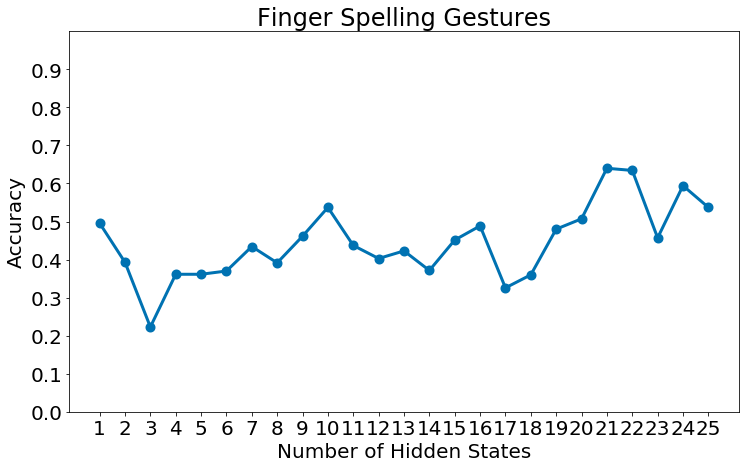

In [153]:
static=pd.read_csv("50-50/static.csv")
staticdf=static.groupby('numHiddenStates').agg({'Accuracy': np.average})
staticdf=staticdf.reset_index()
matplotlib.rc('figure', figsize=(12, 7))
plt.style.use('seaborn-colorblind')
plt.figure()
# plot the linear data and the exponential data
fig, ax = plt.subplots()
plt.xticks(range(1,26))
plt.yticks(np.arange(0,1,step=0.1))
bottom, top = plt.ylim() 
plt.title("Finger Spelling Gestures")
plt.ylim(0,1)
plt.xlabel("Number of Hidden States")
plt.ylabel("Accuracy")
points = ax.plot(staticdf['numHiddenStates'],staticdf['Accuracy'],marker='o',linewidth=3,mew=5,ms=5)
static[static["numHiddenStates"]==21].to_csv("50-50/staticBestResult.csv",index=False)

# Dynamic Gestures Test Results

<Figure size 864x504 with 0 Axes>

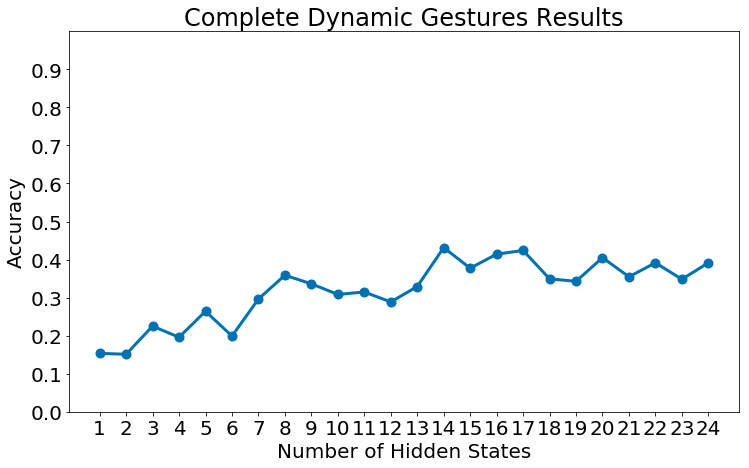

In [152]:
static=pd.read_csv("50-50/dynamic.csv")
staticdf=static.groupby('numHiddenStates').agg({'Accuracy': np.average})
staticdf=staticdf.reset_index()
matplotlib.rc('figure', figsize=(12, 7))
plt.style.use('seaborn-colorblind')
plt.figure()
# plot the linear data and the exponential data
fig, ax = plt.subplots()
plt.xticks(range(1,25))
plt.yticks(np.arange(0,1,step=0.1))
bottom, top = plt.ylim() 
plt.title("Complete Dynamic Gestures Results")
plt.xlabel("Number of Hidden States")
plt.ylabel("Accuracy")
plt.ylim(0,1)
points = ax.plot(staticdf['numHiddenStates'],staticdf['Accuracy'],marker='o',linewidth=3,mew=5,ms=5)
staticdf
static[static["numHiddenStates"]==14].to_csv("50-50/dynamicBestResult.csv",index=False)

# Dynamic Set 1 Results

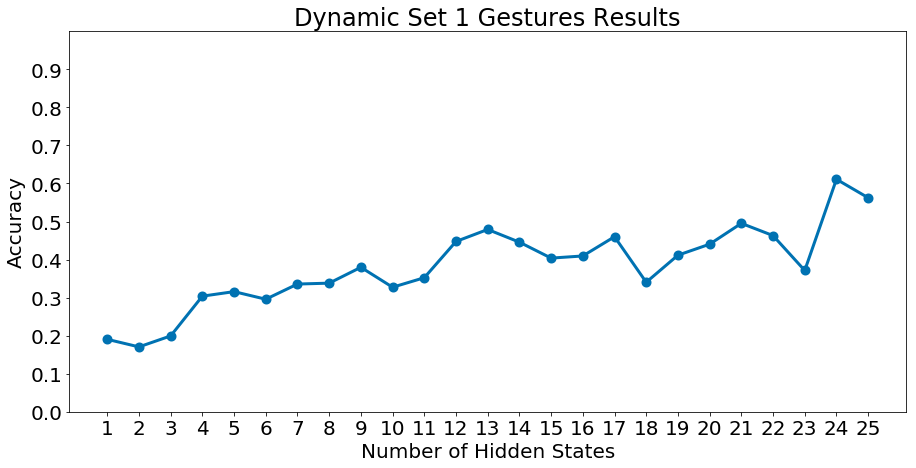

In [151]:
static=pd.read_csv("50-50/dynamic set 1.csv")
staticdf=static.groupby('numHiddenStates').agg({'Accuracy': np.average})
staticdf=staticdf.reset_index()
matplotlib.rc('figure', figsize=(15, 7))
plt.style.use('seaborn-colorblind')
plt.figure()
# plot the linear data and the exponential data
plt.xticks(range(1,26))
plt.yticks(np.arange(0,1,step=0.1))
bottom, top = plt.ylim() 
plt.title("Dynamic Set 1 Gestures Results")
plt.xlabel("Number of Hidden States")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.plot(staticdf['numHiddenStates'],staticdf['Accuracy'],marker='o',linewidth=3,mew=5,ms=5)
static[static["numHiddenStates"]==24].to_csv("dynamicset1BestResult.csv",index=False)

# Dynamic Set 2 Results

<Figure size 864x504 with 0 Axes>

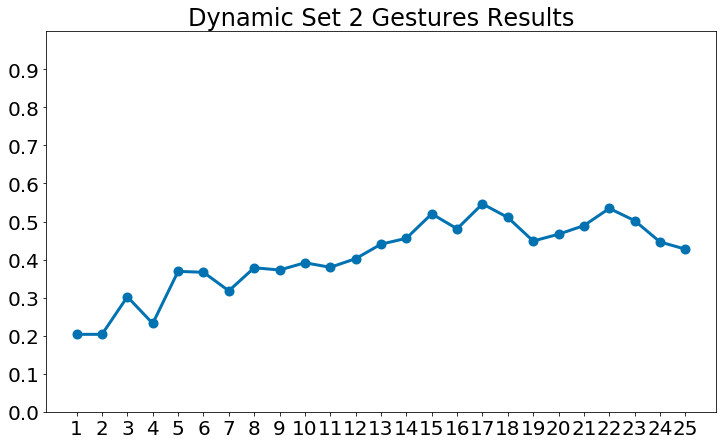

In [150]:
static=pd.read_csv("50-50/dynamic set 2.csv")
staticdf=static.groupby('numHiddenStates').agg({'Accuracy': np.average})
staticdf=staticdf.reset_index()
matplotlib.rc('figure', figsize=(12, 7))
plt.style.use('seaborn-colorblind')
plt.figure()
# plot the linear data and the exponential data
fig, ax = plt.subplots()
plt.xticks(range(1,26))
plt.yticks(np.arange(0,1,step=0.1))
bottom, top = plt.ylim() 
plt.title("Dynamic Set 2 Gestures Results")
plt.ylim(0,1)
points = ax.plot(staticdf['numHiddenStates'],staticdf['Accuracy'],marker='o',linewidth=3,mew=5,ms=5)
static[static["numHiddenStates"]==17].to_csv("dynamicset2BestResult.csv",index=False)

# Dynamic + Finger Spelling

<Figure size 864x504 with 0 Axes>

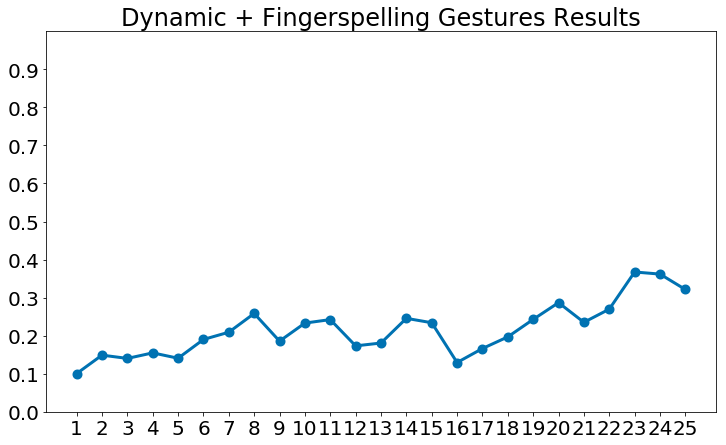

In [149]:
static=pd.read_csv("50-50/complete.csv")
staticdf=static.groupby('numHiddenStates').agg({'Accuracy': np.average})
staticdf=staticdf.reset_index()
matplotlib.rc('figure', figsize=(12, 7))
plt.style.use('seaborn-colorblind')
plt.figure()
# plot the linear data and the exponential data
fig, ax = plt.subplots()
plt.xticks(range(1,26))
plt.yticks(np.arange(0,1,step=0.1))
bottom, top = plt.ylim() 
plt.title("Dynamic + Fingerspelling Gestures Results")
plt.ylim(0,1)
points = ax.plot(staticdf['numHiddenStates'],staticdf['Accuracy'],marker='o',linewidth=3,mew=5,ms=5)
static[static["numHiddenStates"]==23].to_csv("completeBestResult.csv",index=False)

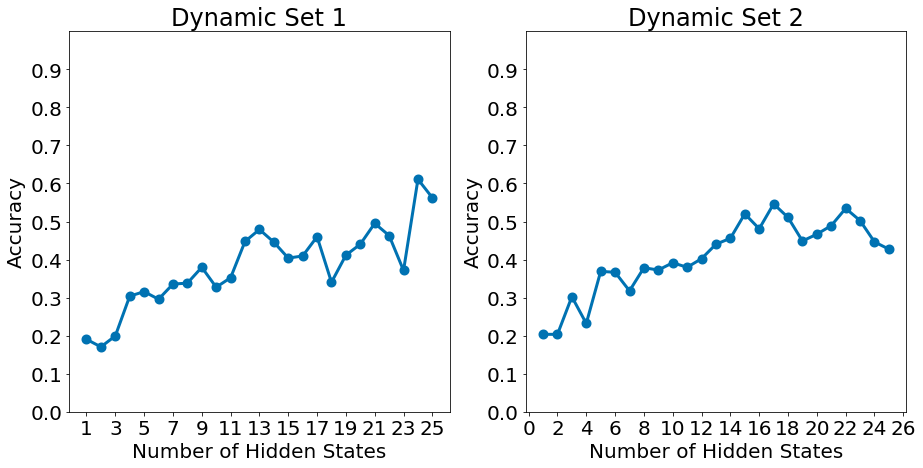

In [148]:
dynamicset1=pd.read_csv("50-50/dynamic set 1.csv")
dynamicset1df=dynamicset1.groupby('numHiddenStates').agg({'Accuracy': np.average})
dynamicset1df=dynamicset1df.reset_index()
dynamicset2=pd.read_csv("50-50/dynamic set 2.csv")
dynamicset2df=dynamicset2.groupby('numHiddenStates').agg({'Accuracy': np.average})
dynamicset2df=dynamicset2df.reset_index()

matplotlib.rc('figure', figsize=(15, 7))
plt.style.use('seaborn-colorblind')
plt.figure()

# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
plt.subplot(1, 2, 1)
plt.xticks(np.arange(1,26,step=2))
plt.yticks(np.arange(0,1,step=0.1))
bottom, top = plt.ylim() 
plt.ylim(0,1)
plt.title('Dynamic Set 1')
plt.plot(dynamicset1df['numHiddenStates'],dynamicset1df['Accuracy'],marker='o',linewidth=3,mew=5,ms=5)
plt.xlabel("Number of Hidden States")
plt.ylabel("Accuracy")
plt.subplot(1, 2, 2)
plt.xticks(np.arange(0,27,step=2))
plt.yticks(np.arange(0,1,step=0.1))
bottom, top = plt.ylim() 
plt.ylim(0,1)
plt.title('Dynamic Set 2')
plt.xlabel("Number of Hidden States")
plt.ylabel("Accuracy")
plt.plot(dynamicset2df['numHiddenStates'],dynamicset2df['Accuracy'],marker='o',linewidth=3,mew=5,ms=5)

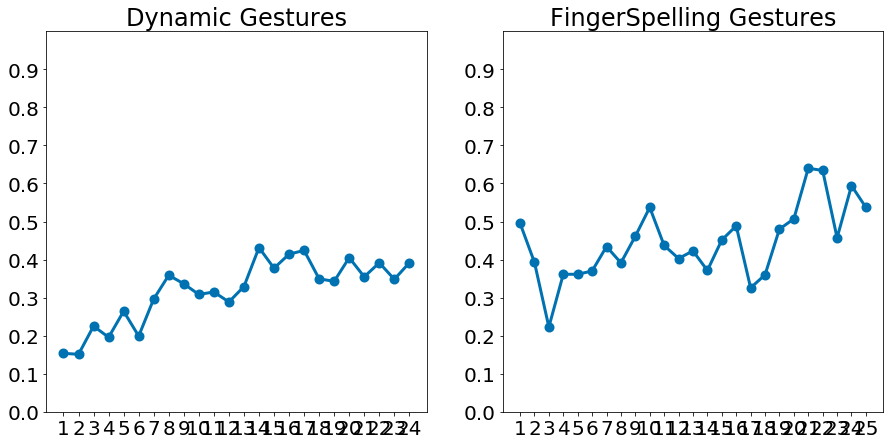

In [146]:
static=pd.read_csv("50-50/static.csv")
staticdf=static.groupby('numHiddenStates').agg({'Accuracy': np.average})
staticdf=staticdf.reset_index()
complete=pd.read_csv("50-50/complete.csv")
completedf=complete.groupby('numHiddenStates').agg({'Accuracy': np.average})
completedf=completedf.reset_index()
dynamic=pd.read_csv("50-50/dynamic.csv")
dynamicdf=dynamic.groupby('numHiddenStates').agg({'Accuracy': np.average})
dynamicdf=dynamicdf.reset_index()
matplotlib.rc('figure', figsize=(15, 7))
plt.style.use('seaborn-colorblind')
plt.figure()
# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
plt.subplot(1, 2, 1)
plt.xticks(range(1,25))
plt.yticks(np.arange(0,1,step=0.1))
bottom, top = plt.ylim() 
plt.ylim(0,1)
plt.title('Dynamic Gestures')
plt.plot(dynamicdf['numHiddenStates'],dynamicdf['Accuracy'],marker='o',linewidth=3,mew=5,ms=5)
plt.subplot(1, 2, 2)
plt.xticks(range(1,26))
plt.yticks(np.arange(0,1,step=0.1))
bottom, top = plt.ylim() 
plt.ylim(0,1)
plt.title('FingerSpelling Gestures')
plt.plot(staticdf['numHiddenStates'],staticdf['Accuracy'],marker='o',linewidth=3,mew=5,ms=5)

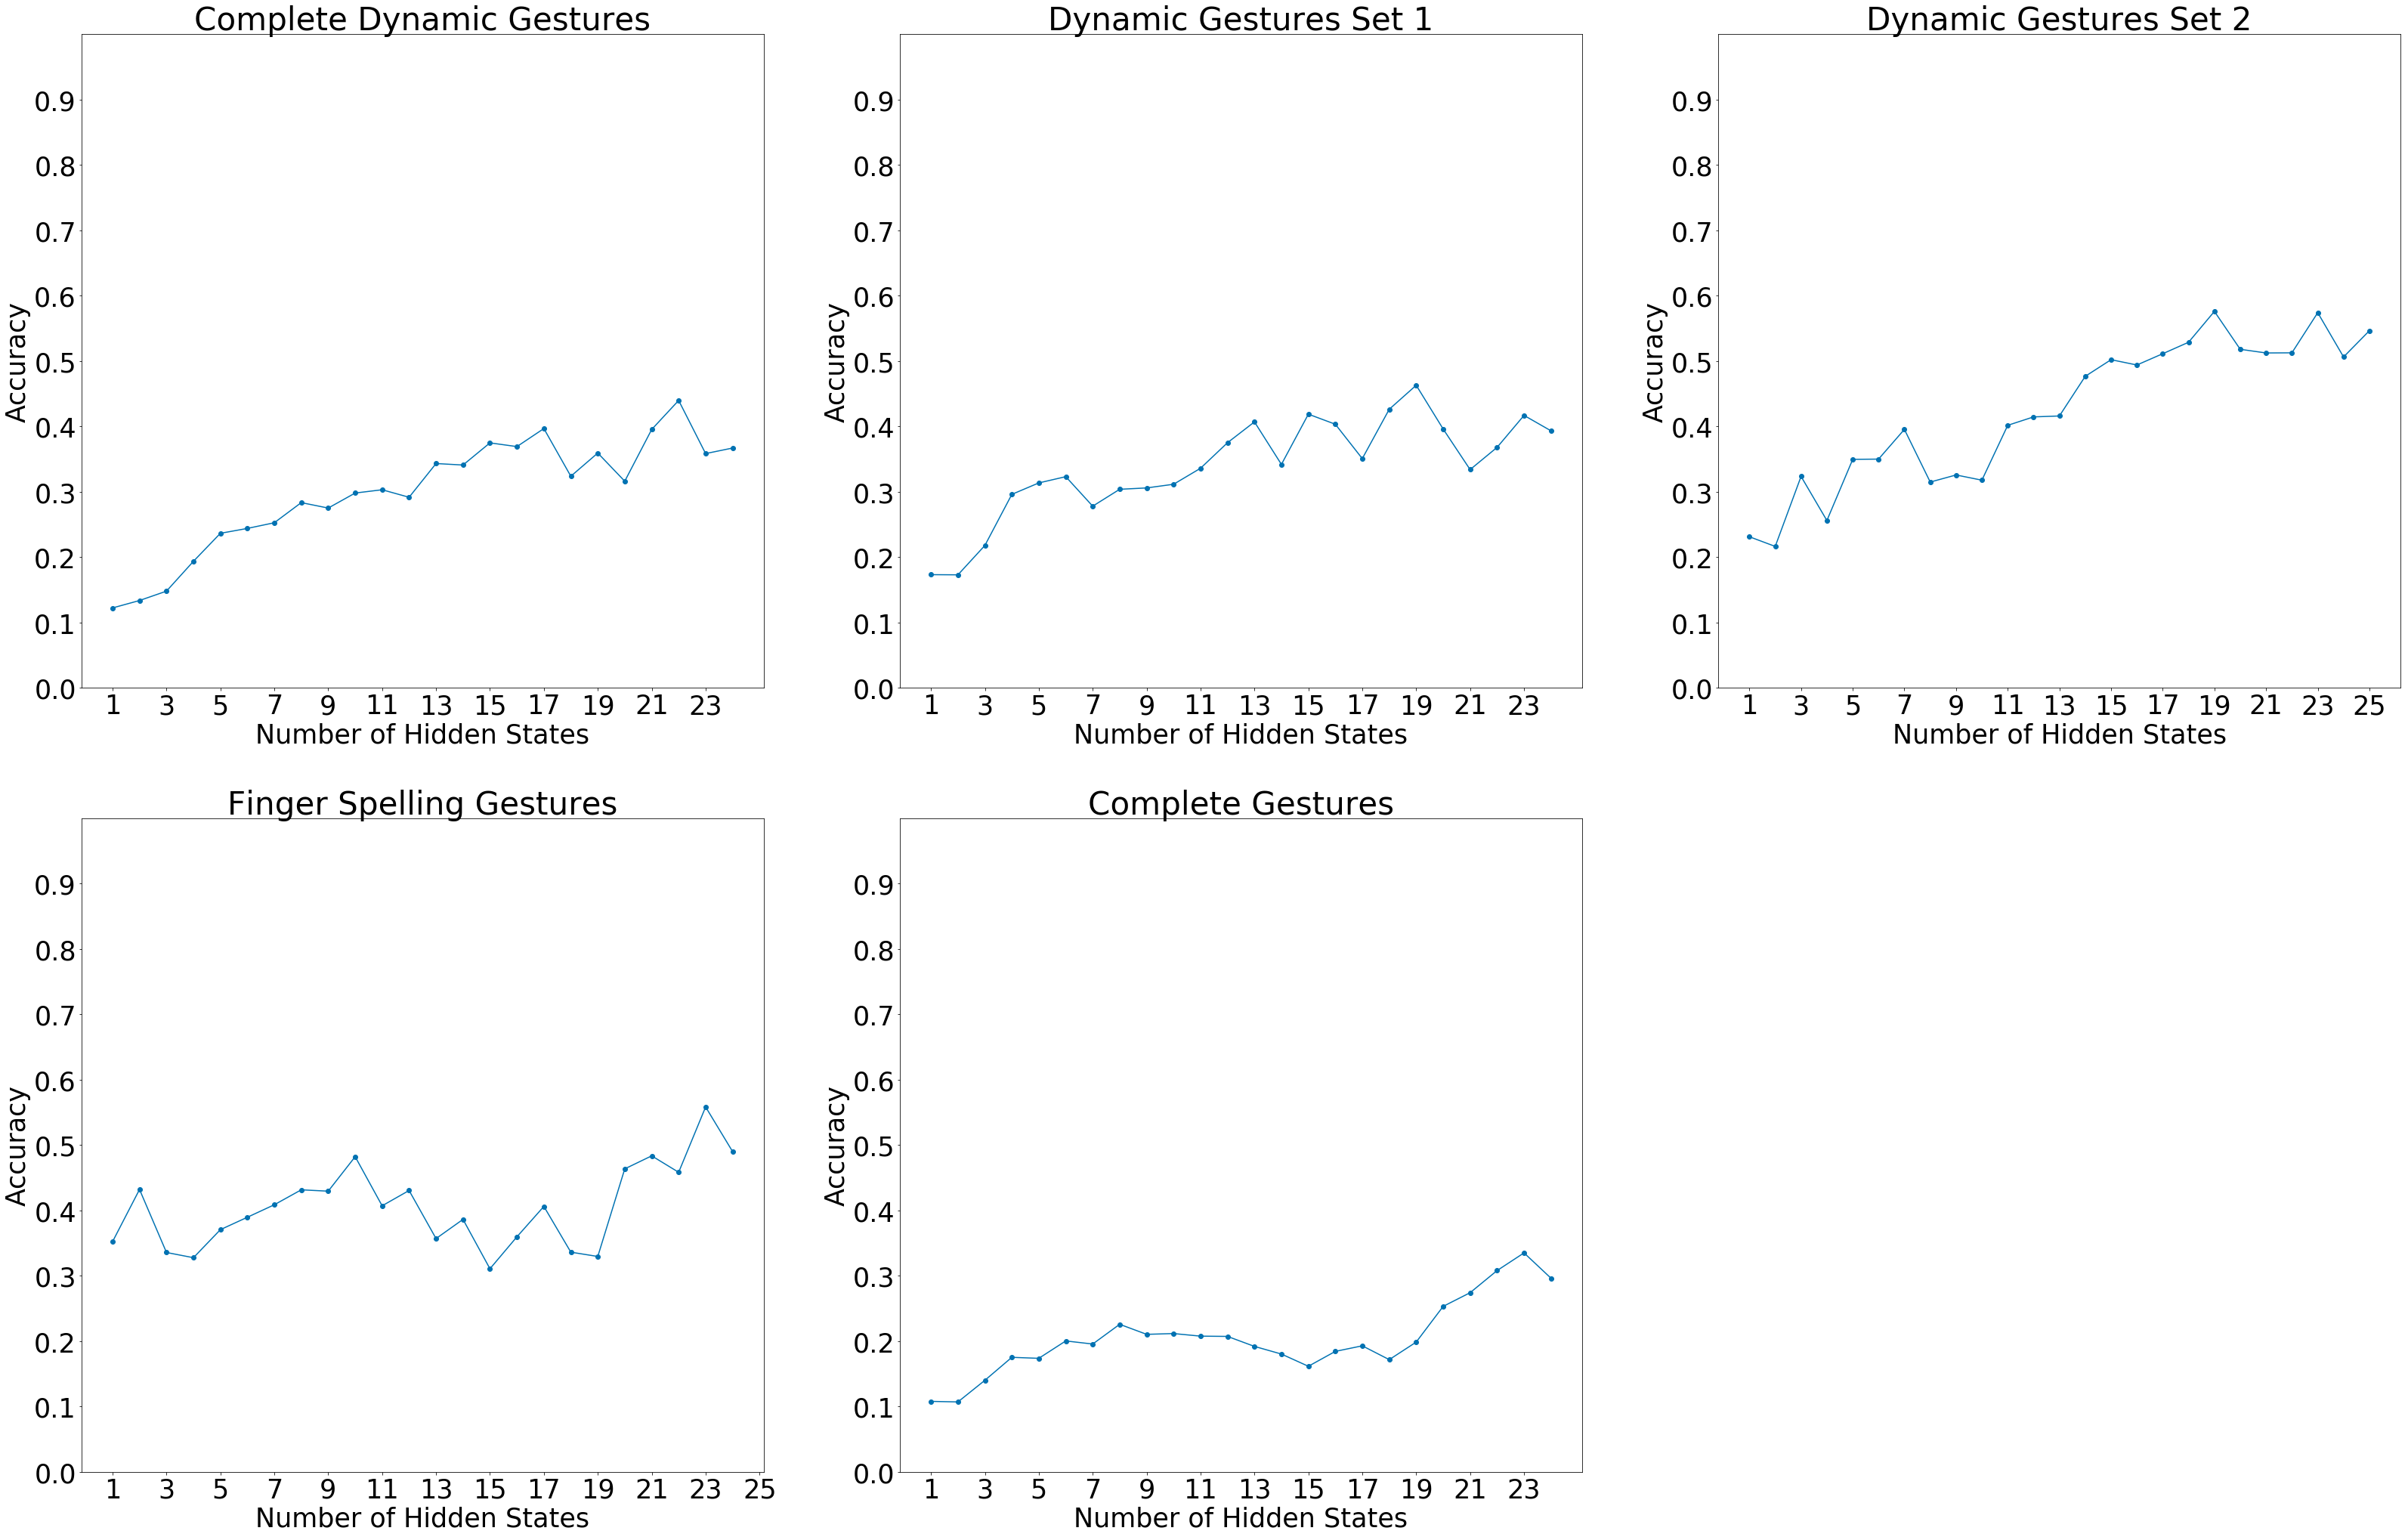

In [84]:
matplotlib.rc('figure', figsize=(55, 35))
plt.style.use('seaborn-colorblind')
plt.figure()
plt.rcParams.update({'font.size': 35})
# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
plt.subplot(2, 3, 1)
plt.xticks(np.arange(1,25,step=2))
plt.yticks(np.arange(0,1,step=0.1))
bottom, top = plt.ylim() 
plt.ylim(0,1)
plt.title('Complete Dynamic Gestures')
plt.xlabel("Number of Hidden States")
plt.ylabel("Accuracy")
plt.plot(dynamicdf['numHiddenStates'],dynamicdf['Accuracy'],marker='o')
plt.subplot(2, 3, 2)
plt.xticks(np.arange(1,25,step=2))
plt.yticks(np.arange(0,1,step=0.1))
bottom, top = plt.ylim() 
plt.ylim(0,1)
plt.xlabel("Number of Hidden States")
plt.ylabel("Accuracy")
plt.title('Dynamic Gestures Set 1')
plt.plot(dynamicset1df['numHiddenStates'],dynamicset1df['Accuracy'],marker='o')
plt.subplot(2, 3, 3)
plt.xticks(np.arange(1,26,step=2))
plt.yticks(np.arange(0,1,step=0.1))
bottom, top = plt.ylim() 
plt.ylim(0,1)
plt.xlabel("Number of Hidden States")
plt.ylabel("Accuracy")
plt.title('Dynamic Gestures Set 2')
plt.plot(dynamicset2df['numHiddenStates'],dynamicset2df['Accuracy'],marker='o')
plt.subplot(2, 3, 4)
plt.xticks(np.arange(1,26,step=2))
plt.yticks(np.arange(0,1,step=0.1))
bottom, top = plt.ylim() 
plt.ylim(0,1)
plt.xlabel("Number of Hidden States")
plt.ylabel("Accuracy")
plt.title('Finger Spelling Gestures')
plt.plot(staticdf['numHiddenStates'],staticdf['Accuracy'],marker='o')
plt.subplot(2, 3, 5)
plt.xticks(np.arange(1,25,step=2))
plt.yticks(np.arange(0,1,step=0.1))
bottom, top = plt.ylim() 
plt.ylim(0,1)
plt.xlabel("Number of Hidden States")
plt.ylabel("Accuracy")
plt.title('Complete Gestures')
plt.plot(completedf['numHiddenStates'],completedf['Accuracy'],marker='o')

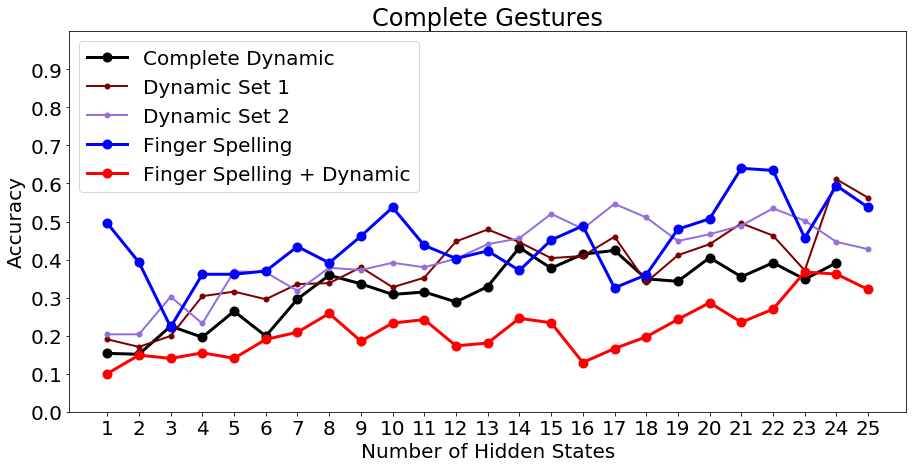

In [145]:
#matplotlib.rc('figure', figsize=(55, 35))
plt.style.use('seaborn-colorblind')
plt.figure()
#plt.rcParams.update({'font.size': 35})
# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
plt.plot(dynamicdf['numHiddenStates'],dynamicdf['Accuracy'],marker='o',color="black",linewidth=3,mew=5,ms=5)
plt.plot(dynamicset1df['numHiddenStates'],dynamicset1df['Accuracy'],marker="o",color="maroon",linewidth=2,mew=3,ms=3)
plt.plot(dynamicset2df['numHiddenStates'],dynamicset2df['Accuracy'],marker="o",color="mediumpurple",linewidth=2,mew=3,ms=3)
plt.plot(staticdf['numHiddenStates'],staticdf['Accuracy'],marker='o',color="b",linewidth=3,mew=5,ms=5)
plt.plot(completedf['numHiddenStates'],completedf['Accuracy'],marker='o',color="r",linewidth=3,mew=5,ms=5)
plt.xlabel("Number of Hidden States")
plt.ylabel("Accuracy")
plt.title('Complete Gestures')
plt.xticks(np.arange(1,26,step=1))
plt.yticks(np.arange(0,1,step=0.1))
bottom, top = plt.ylim() 
plt.ylim(0,1)
plt.legend(['Complete Dynamic', 'Dynamic Set 1', 'Dynamic Set 2',"Finger Spelling","Finger Spelling + Dynamic"])

In [ ]:
static=pd.read_csv("results/emman results/complete/complete.csv")
staticdf=static.groupby('numHiddenStates').agg({'accuracy': np.average})
staticdf=staticdf.reset_index()
matplotlib.rc('figure', figsize=(12, 7))
plt.style.use('seaborn-colorblind')
plt.figure()
# plot the linear data and the exponential data
fig, ax = plt.subplots()
plt.xticks(range(1,24))
plt.yticks(np.arange(0,1,step=0.1))
bottom, top = plt.ylim() 
plt.ylim(0,1)
points = ax.plot(staticdf['numHiddenStates'],staticdf['accuracy'],marker='o')
staticdf

In [ ]:
results=pd.read_csv("results/resultsperset.csv")
fig=plt.figure()
bottom, top = plt.ylim() 
plt.ylim(0,1) 
barcollection = plt.bar(results["test set"].unique(),results[results["numHiddenStates"]==1]["accuracy"])
plt.show()

In [165]:
df=pd.read_csv("50-50/completeBestResult.csv")
gestures=df["gesture"].unique().tolist()
df["False Positive"]=0
df["False Negative"]=0
for gesture in gestures:
    falsePositive=0
    '''samplelist=df[df["gesture"]==gesture]["Actual"].values[0]
    samplelist=samplelist[1:len(samplelist)-1]
    samplelist=samplelist.split(",")
    samplelist=[s.replace('\'', '') for s in samplelist]
    samplelist=[s.replace(' ', '') for s in samplelist]'''
    notdf=df[df["gesture"]!=gesture]
    notdfgestures=notdf["gesture"].unique().tolist()
    for notdfgesture in notdfgestures:
        samplelist=notdf[notdf["gesture"]==notdfgesture]["Predicted"].values[0]
        samplelist=samplelist[1:len(samplelist)-1]
        samplelist=samplelist.split(",")
        samplelist=[s.replace('\'', '') for s in samplelist]
        samplelist=[s.replace(' ', '') for s in samplelist]
        for word in samplelist:
            if(word==gesture):
                falsePositive+=1
    #print(df[df["gesture"]==gesture].index[0])
    df.at[df[df["gesture"]==gesture].index[0],"False Positive"]=int(falsePositive)
    #print("False positive for "+str(gesture)+":"+str(falsePositive))
df["False Negative"]=df["Total Test"]-df["Total True"]
df["Precision"]=df["Total True"]/(df["Total True"]+df["False Positive"])
df["Recall"]=df["Total True"]/(df["Total True"]+df["False Negative"])
df["F1"]=2*(df["Recall"]+df["Precision"])/(df["Recall"]*df["Precision"])
df=df.fillna(0)
df
df.to_csv("50-50/completeBestResult.csv",index=False)
#df.to_csv("results/dynamicmatrix2.csv",index=False)

,gesture,Total True,Total Test,Accuracy,Actual,Predicted,False Positive,False Negative,Precision,Recall,F1
0,after,2,5,0.400000,"['after', 'after', 'after', 'after', 'after']","['like', 'like', 'after', 'after', 'like']",0,3,1.000000,0.400000,7.000000
1,again,5,5,1.000000,"['again', 'again', 'again', 'again', 'again']","['again', 'again', 'again', 'again', 'again']",0,0,1.000000,1.000000,4.000000
2,all,4,5,0.800000,"['all', 'all', 'all', 'all', 'all']","['all', 'all', 'like', 'all', 'all']",0,1,1.000000,0.800000,4.500000
3,bad,4,4,1.000000,"['bad', 'bad', 'bad', 'bad']","['bad', 'bad', 'bad', 'bad']",5,0,0.444444,1.000000,6.500000
4,bathroom,4,5,0.800000,"['bathroom', 'bathroom', 'bathroom', 'bathroom...","['bathroom', 'bathroom', 'bathroom', 'like', '...",0,1,1.000000,0.800000,4.500000
5,before,6,6,1.000000,"['before', 'before', 'before', 'before', 'befo...","['before', 'before', 'before', 'before', 'befo...",0,0,1.000000,1.000000,4.000000
6,big,1,4,0.250000,"['big', 'big', 'big', 'big']","['big', 'like', 'like', 'like']",0,3,1.000000,0.250000,10.000000
7,boy,5,6,0.833333,"['boy', 'boy', 'boy', 'boy', 'boy', 'boy']","['boy', 'like', 'boy', 'boy', 'boy', 'boy']",0,1,1.000000,0.833333,4.400000
8,doctor,3,4,0.750000,"['doctor', 'doctor', 'doctor', 'doctor']","['like', 'doctor', 'doctor', 'doctor']",0,1,1.000000,0.750000,4.666667
9,father,4,4,1.000000,"['father', 'father', 'father', 'father']","['father', 'father', 'father', 'father']",0,0,1.000000,1.000000,4.000000


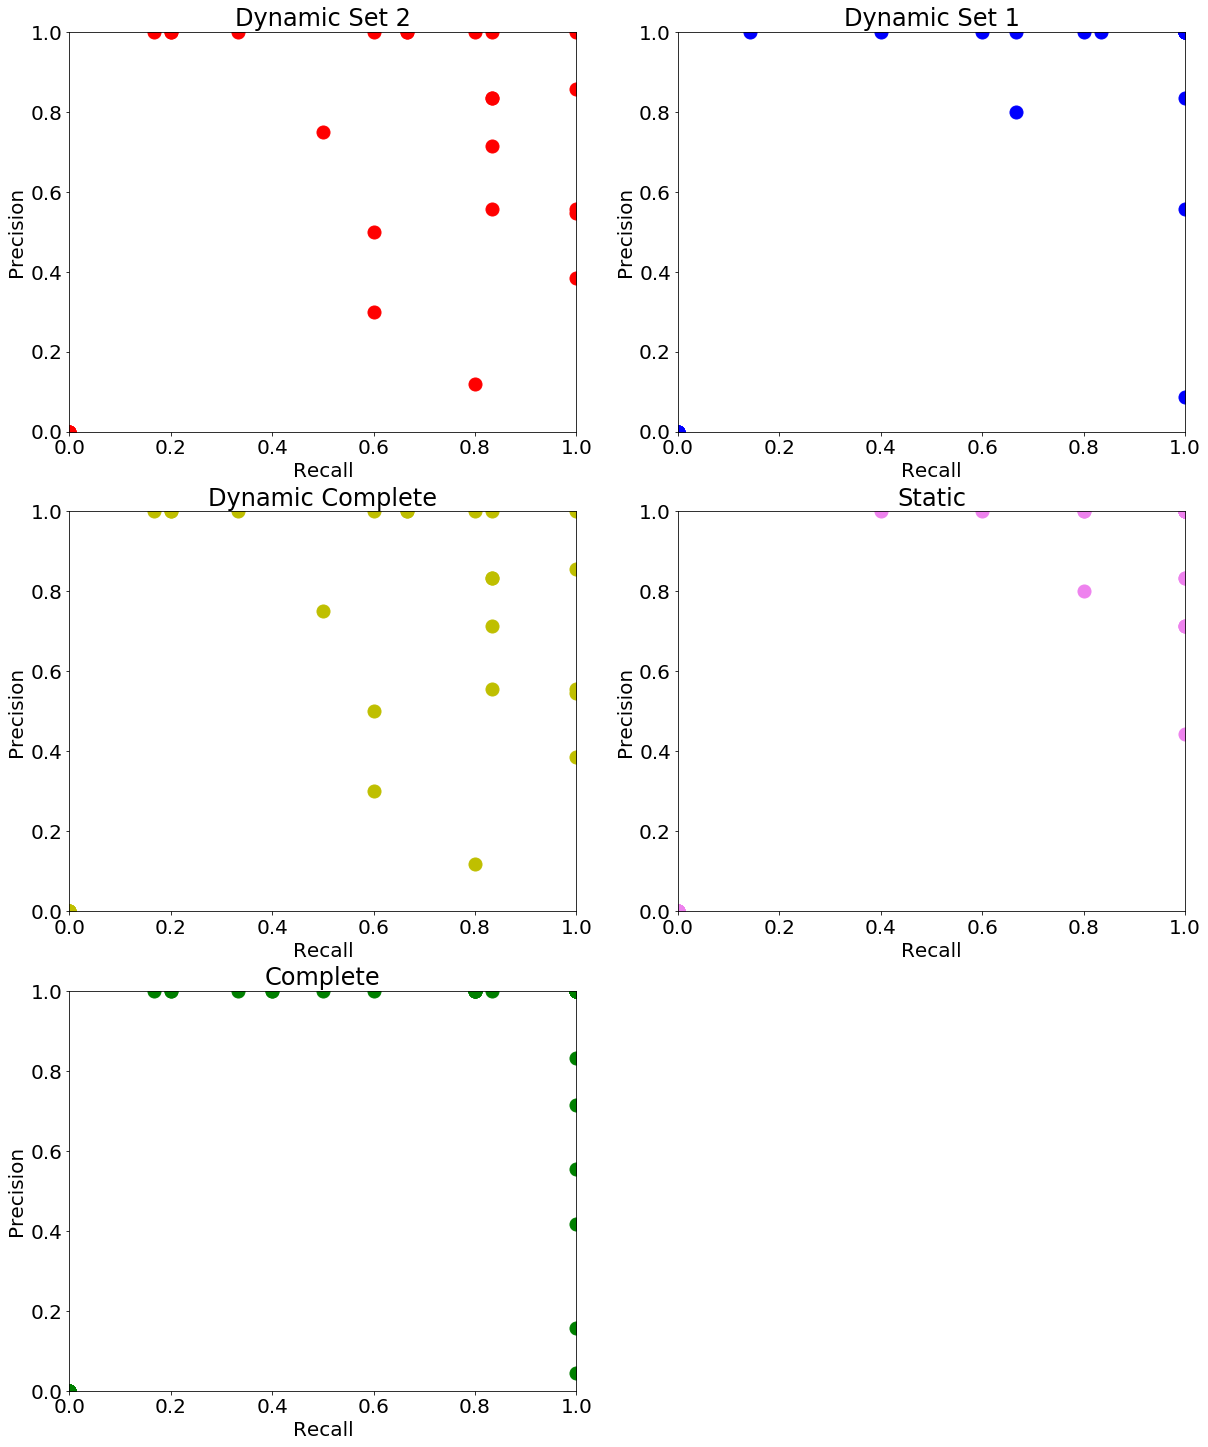

,gesture,numHiddenStates,Total True,Total Test,Accuracy,Actual,Predicted,False Positive,False Negative,Precision,Recall,F1
0,after,23,0,5,0.000000,"['after', 'after', 'after', 'after', 'after']","['b', 'b', 'b', 's', 'b']",0,5,0.0,0.000000,0.000000
1,again,23,0,5,0.000000,"['again', 'again', 'again', 'again', 'again']","['b', 'b', 'b', 'b', 's']",0,5,0.0,0.000000,0.000000
3,bad,23,0,5,0.000000,"['bad', 'bad', 'bad', 'bad', 'bad']","['b', 'b', 'b', 'b', 'like']",0,5,0.0,0.000000,0.000000
5,before,23,0,6,0.000000,"['before', 'before', 'before', 'before', 'befo...","['t', 't', 't', 's', 'v', 'v']",0,6,0.0,0.000000,0.000000
8,doctor,23,0,5,0.000000,"['doctor', 'doctor', 'doctor', 'doctor', 'doct...","['s', 'v', 't', 't', 't']",0,5,0.0,0.000000,0.000000
9,father,23,0,5,0.000000,"['father', 'father', 'father', 'father', 'fath...","['b', 'b', 's', 'b', 'b']",0,5,0.0,0.000000,0.000000
10,fine,23,0,5,0.000000,"['fine', 'fine', 'fine', 'fine', 'fine']","['t', 'like', 't', 't', 't']",0,5,0.0,0.000000,0.000000
11,finish,23,0,5,0.000000,"['finish', 'finish', 'finish', 'finish', 'fini...","['t', 's', 't', 't', 's']",0,5,0.0,0.000000,0.000000
13,friday,23,0,6,0.000000,"['friday', 'friday', 'friday', 'friday', 'frid...","['t', 't', 't', 's', 's', 's']",0,6,0.0,0.000000,0.000000
14,friend,23,0,6,0.000000,"['friend', 'friend', 'friend', 'friend', 'frie...","['t', 't', 's', 's', 'like', 't']",0,6,0.0,0.000000,0.000000


In [183]:
df=pd.read_csv("50-50/dynamicset2BestResult.csv")
df=df.sort_values(by=["Precision","Recall"],ascending=[True,False])
precision=df["Precision"].tolist()
recall=df["Recall"].tolist()
matplotlib.rc('figure', figsize=(20, 25))
plt.figure()
plt.rcParams.update({'font.size': 20})
plt.subplot(3,2,1)
plt.ylim(0,1)
plt.xlim(0,1)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Dynamic Set 2")
plt.scatter(recall,precision,marker="o",s=170,color="r",label="Dynamic Gestures 2")
words=df["gesture"].unique().tolist()
'''for i, txt in enumerate(words):
    y=df[df["gesture"]==txt]["Precision"].tolist()[0]
    x=df[df["gesture"]==txt]["Recall"].tolist()[0]
    plt.annotate(txt, (x, y))'''
df=pd.read_csv("50-50/dynamicset1BestResult.csv")
df=df.sort_values(by=["Precision","Recall"],ascending=[True,False])
precision=df["Precision"].tolist()
recall=df["Recall"].tolist()
plt.subplot(3,2,2)
plt.ylim(0,1)
plt.xlim(0,1)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Dynamic Set 1")
plt.scatter(recall,precision,marker="o",s=170,color="b",label="Dynamic Gestures 2")
df=pd.read_csv("50-50/dynamicset2BestResult.csv")
df=df.sort_values(by=["Precision","Recall"],ascending=[True,False])
precision=df["Precision"].tolist()
recall=df["Recall"].tolist()
plt.subplot(3,2,3)
plt.ylim(0,1)
plt.xlim(0,1)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Dynamic Complete")
plt.scatter(recall,precision,marker="o",s=170,color="y",label="Dynamic Gestures 2")
df=pd.read_csv("50-50/staticBestResult.csv")
df=df.sort_values(by=["Precision","Recall"],ascending=[True,False])
precision=df["Precision"].tolist()
recall=df["Recall"].tolist()
plt.subplot(3,2,4)
plt.ylim(0,1)
plt.xlim(0,1)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Static")
plt.scatter(recall,precision,marker="o",s=170,color="violet",label="Dynamic Gestures 2")
df=pd.read_csv("50-50/completeBestResult.csv")
df=df.sort_values(by=["Precision","Recall"],ascending=[True,False])
precision=df["Precision"].tolist()
recall=df["Recall"].tolist()
plt.subplot(3,2,5)
plt.ylim(0,1)
plt.xlim(0,1)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Complete")
plt.scatter(recall,precision,marker="o",s=170,color="g",label="Dynamic Gestures 2")
plt.show()
df

In [177]:
static=pd.read_csv("50-50/static.csv")
staticdf=static.groupby('numHiddenStates').agg({'Accuracy': np.average})
staticdf["test case"]="Static"
totalresults=staticdf
dynamic=pd.read_csv("50-50/dynamic.csv")
dynamicdf=dynamic.groupby('numHiddenStates').agg({'Accuracy': np.average})
dynamicdf["test case"]="Dynamic"
totalresults=totalresults.append(dynamicdf)
dynamicset2=pd.read_csv("50-50/dynamic set 2.csv")
dynamicset2df=dynamicset2.groupby('numHiddenStates').agg({'Accuracy': np.average})
dynamicset2df["test case"]="Dynamic Set 2"
totalresults=totalresults.append(dynamicset2df)
dynamicset1=pd.read_csv("50-50/dynamic set 1.csv")
dynamicset1df=dynamicset1.groupby('numHiddenStates').agg({'Accuracy': np.average})
dynamicset1df["test case"]="Dynamic Set 1"
totalresults=totalresults.append(dynamicset1df)
complete=pd.read_csv("50-50/complete.csv")
completedf=complete.groupby('numHiddenStates').agg({'Accuracy': np.average})
completedf["test case"]="Complete"
totalresults=totalresults.append(completedf)
totalresults.reset_index().to_csv("50-50/totalresults.csv",index=False)

In [185]:
df=pd.read_csv("50-50/totalresults.csv")

,numHiddenStates,Accuracy,test case
24,25,0.537143,Static
73,25,0.427381,Dynamic Set 2
98,25,0.562500,Dynamic Set 1
123,25,0.321429,Complete
